In [1]:
import numpy as np
import matplotlib.pyplot as plt
                

In [2]:
grid_size = 10
start = (0,0)
goal = (9,9)
obstacles = [(2,3), (3,3), (1,1)]

In [3]:
q_table = np.zeros((grid_size, grid_size, 4))

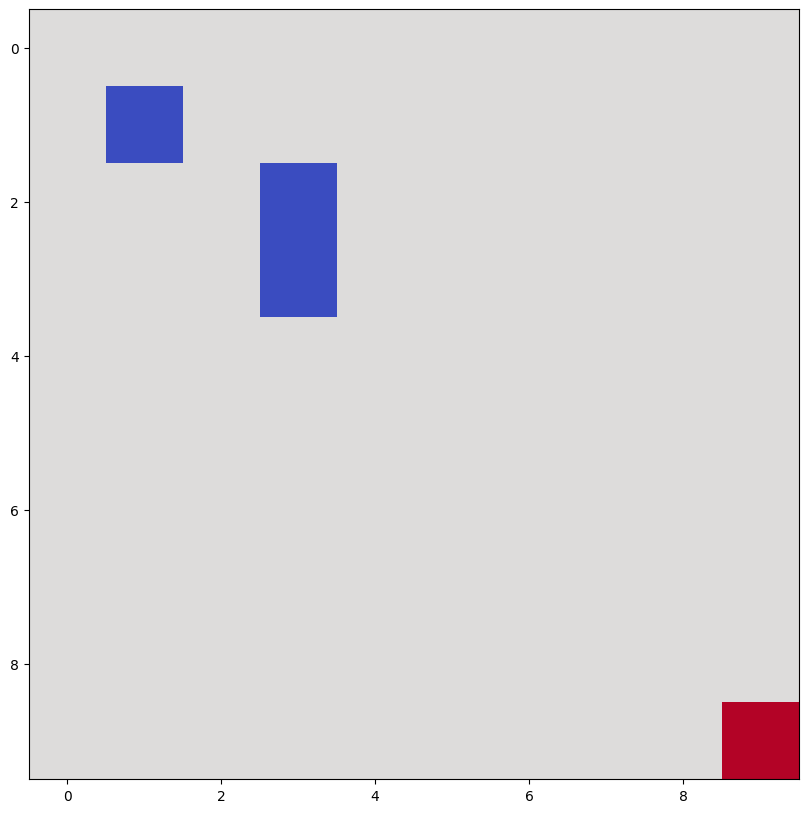

In [4]:
grid = np.zeros((grid_size, grid_size))
for obstacle in obstacles:
    grid[obstacle] = -1
grid[goal] = 1

plt.figure(figsize=(10,10))
plt.imshow(grid, cmap="coolwarm")


In [5]:
actions = [(-1,0), (1,0), (0,1), (0,-1)]

In [6]:
alpha = 0.1
gamma = 0.9
epsilon = 0.99

In [7]:
def get_reward(state):
    if state == goal:
        return 10
    elif state in obstacles:
        return -50
    else:
        return -1



In [8]:
def get_next_state(state, actions):
    next_state=(state[0] + action[0], state[1] + action[1])
    if 0 <= next_state[0] < grid_size and 0 <= next_state[1] < grid_size:
        return next_state
    return state

In [9]:
for episode in range(100):
    state = start
    while state != goal:
        if np.random.rand() < epsilon:
            action_index = np.random.randint(4)
        else:
            action_index = np.argmax(q_table[state[0], state[1], :])

        action = actions[action_index]
        next_state = get_next_state(state, action)
    
        reward = get_reward(next_state)
    
        old_value = q_table[state[0], state[1], action_index]
        next_max = np.max(q_table[next_state[0], next_state[1], :])
        q_table[state[0], state[1], action_index] =old_value + alpha * (reward + gamma * next_max - old_value)
        state = next_state

In [10]:
state = start

In [11]:
path = [state]
while state != goal:
    action_index = np.argmax(q_table[state[0], state[1], :])
    action = actions[action_index]
    state = get_next_state(state, action)
    path.append(state)

print("i got ", path)

i got  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


<function matplotlib.pyplot.show(close=None, block=None)>

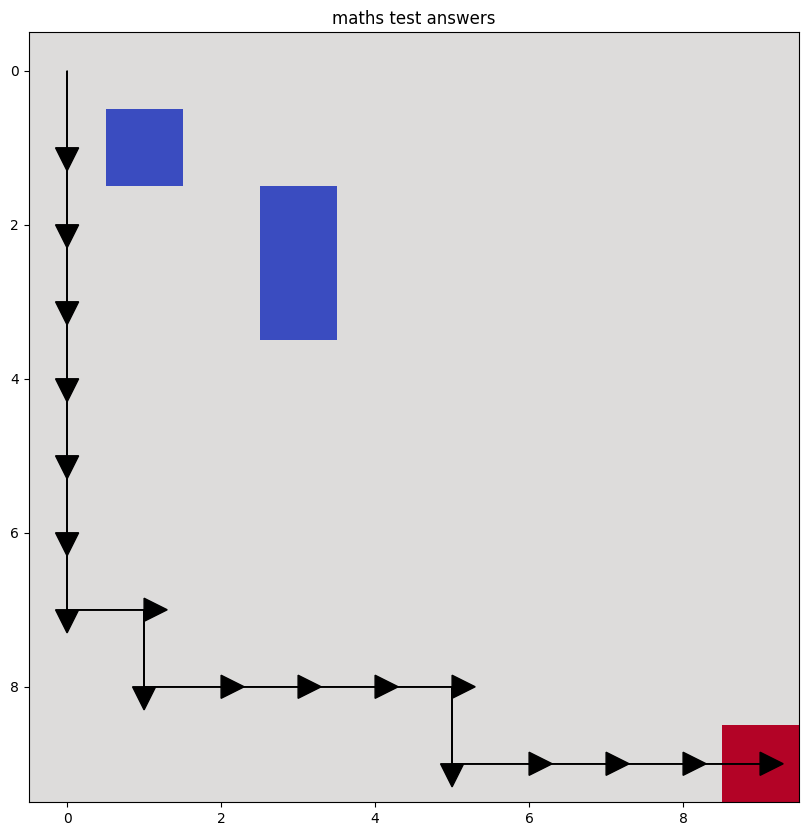

In [12]:
grid = np.zeros((grid_size, grid_size))
for obstacle in obstacles:
    grid[obstacle] = -1
grid[goal] = 1

plt.figure(figsize=(10,10))
plt.imshow(grid, cmap="coolwarm")

for i in range(len(path) - 1):
    current = path[i]
    next_ = path[i+1]
    plt.arrow(
        current[1], current[0],
        next_[1] - current[1], next_[0] - current[0],
        head_width = 0.3, head_length= 0.3, fc = "black", ec="black"
        
    )

plt.title("maths test answers")
plt.show